In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Loading the studio ghibli data
dataset = pd.read_csv('Studio Ghibli.csv')

In [41]:
# Displaying the first row of the dataset
print(dataset.head(1))

                                   Name  Year              Director  \
0  When Marnie Was There\n       (2014)  2014  Hiromasa Yonebayashi   

         Screenplay          Budget       Revenue    Genre 1 Genre 2 Genre 3  \
0  Joan G. Robinson  $1150000000.00  $34949567.00  Animation   Drama     NaN   

  Duration  
0   1h 43m  


In [42]:
# Check for missing values
print(dataset.isnull().sum())

Name          0
Year          0
Director      0
Screenplay    9
Budget        0
Revenue       0
Genre 1       0
Genre 2       0
Genre 3       4
Duration      0
dtype: int64


In [43]:
# Since genre and screenplay are missing values, we will drop the columns with missing values
dataset = dataset.dropna(axis=1)

# Check for missing values
print(dataset.isnull().sum())

Name        0
Year        0
Director    0
Budget      0
Revenue     0
Genre 1     0
Genre 2     0
Duration    0
dtype: int64


In [44]:
# Removing the $ sign from the Budget and Revenue columns for easier manipulation
dataset['Budget'] = dataset['Budget'].str.replace('$', '').astype(float)
dataset['Revenue'] = dataset['Revenue'].str.replace('$', '').astype(float)

In [45]:
print(dataset.head(1))

                                   Name  Year              Director  \
0  When Marnie Was There\n       (2014)  2014  Hiromasa Yonebayashi   

         Budget     Revenue    Genre 1 Genre 2 Duration  
0 1150000000.00 34949567.00  Animation   Drama   1h 43m  


In [46]:
# Are there any Studio Ghibli films that have unusually high budgets compared to others?

# Outlier Detection using Z-Score and IQR
# Percentile
q1, q3 = np.percentile(dataset['Budget'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers_using_iqr = dataset[(dataset['Budget'] < lower_bound) | (dataset['Budget'] > upper_bound)]


In [47]:
# Print the outliers calculated using IQR and avoid the scientific notation for Budget and Revenue
outliers_using_iqr[['Budget', 'Revenue']].style.format('{:.2f}'.format)

print(outliers_using_iqr)

                                    Name  Year              Director  \
0   When Marnie Was There\n       (2014)  2014  Hiromasa Yonebayashi   
22                 The Boy and the Heron  2023        Hayao Miyazaki   

          Budget      Revenue    Genre 1    Genre 2 Duration  
0  1150000000.00  34949567.00  Animation      Drama   1h 43m  
22  100000000.00 167000000.00    Fantasy  Adventure    2h 4m  


In [48]:
# Z-Score
threshold = 3
z = np.abs((dataset['Budget'] - dataset['Budget'].mean()) / dataset['Budget'].std())
outliers_using_z = dataset[z > threshold]

In [49]:
# print the outliers calculated using Z-Score and avoid the scientific notation for Budget and Revenue
outliers_using_z[['Budget', 'Revenue']].style.format('{:.2f}'.format)
print(outliers_using_z)

                                   Name  Year              Director  \
0  When Marnie Was There\n       (2014)  2014  Hiromasa Yonebayashi   

         Budget     Revenue    Genre 1 Genre 2 Duration  
0 1150000000.00 34949567.00  Animation   Drama   1h 43m  


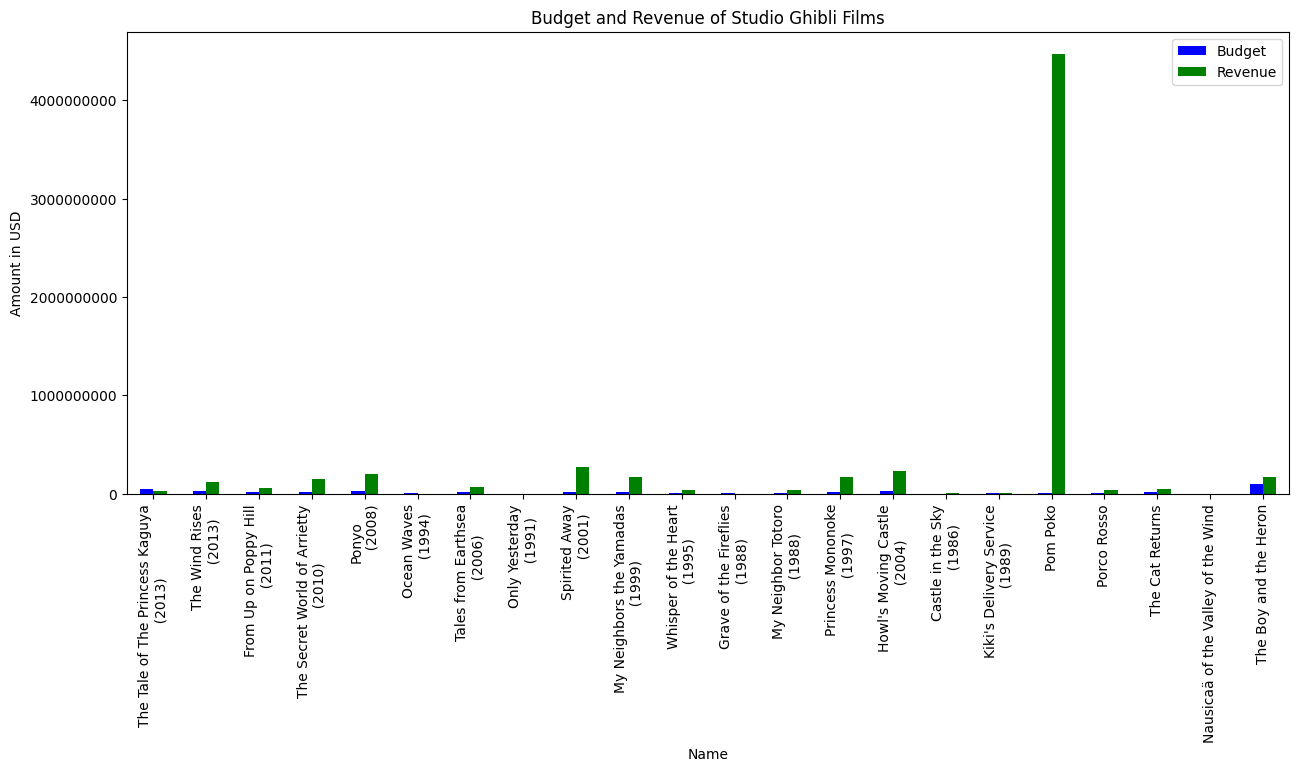

In [66]:
# Plotting the Budget and Revenue of Studio Ghibli films grouping by the movie name excluding the outliers
dataset_exclude_outliers = dataset[~dataset['Name'].isin(outliers_using_z['Name'])]

ax = dataset_exclude_outliers.plot(kind='bar', x='Name', y=['Budget', 'Revenue'], figsize=(15, 6), color=['blue', 'green'])

# avoid scientific notation for ylabel
plt.ticklabel_format(style='plain', axis='y')
plt.title('Budget and Revenue of Studio Ghibli Films')
plt.ylabel('Amount in USD')
plt.show()


In [60]:
# Identifying the movie with unusually high revenue compared to others
# Outlier Detection using Z-Score
threshold = 3
z = np.abs((dataset['Revenue'] - dataset['Revenue'].mean()) / dataset['Revenue'].std())
outliers_using_z_revenue = dataset[z > threshold]

In [61]:
# print the outliers calculated using Z-Score and avoid the scientific notation for Budget and Revenue
outliers_using_z_revenue[['Budget', 'Revenue']].style.format('{:.2f}'.format)
print(outliers_using_z_revenue)

        Name  Year       Director      Budget       Revenue    Genre 1  \
18  Pom Poko  1994  Isao Takahata 12000000.00 4470000000.00  Adventure   

      Genre 2 Duration  
18  Animation   1h 59m  


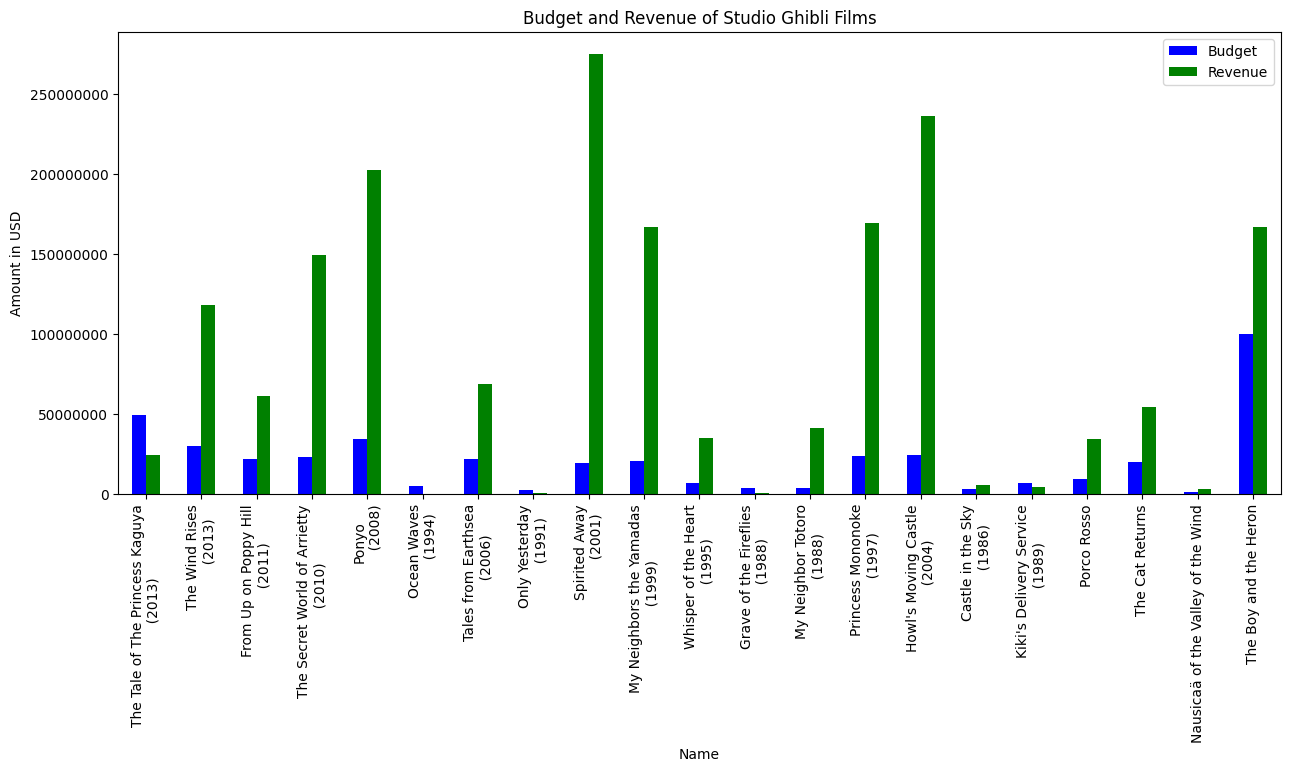

In [73]:
# Exclude the outlier and plot the Budget and Revenue of Studio Ghibli films
dataset_exclude_outliers_revenue = dataset[~dataset['Name'].isin(outliers_using_z_revenue['Name'])]
dataset_exclude_outliers_revenue_budget = dataset_exclude_outliers_revenue[~dataset_exclude_outliers_revenue['Name'].isin(outliers_using_z['Name'])]

ax = dataset_exclude_outliers_revenue_budget.plot(kind='bar', x='Name', y=['Budget', 'Revenue'], figsize=(15, 6), color=['blue', 'green'])

# avoid scientific notation for ylabel
plt.ticklabel_format(style='plain', axis='y')
plt.title('Budget and Revenue of Studio Ghibli Films')
plt.ylabel('Amount in USD')
plt.show()


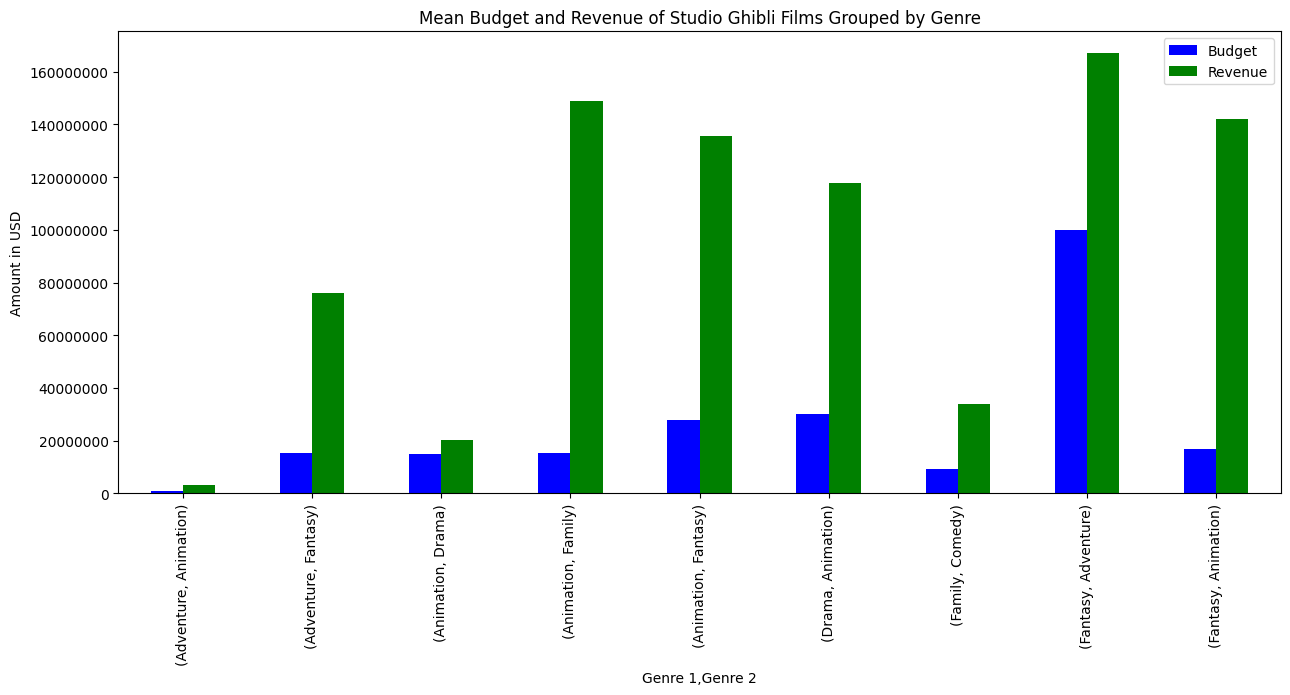

In [75]:
# Comparitive analysis of the Budget and Revenue of Studio Ghibli films grouped by the genre
# Grouping the data by genre and calculating the mean budget and revenue
genre_group = dataset_exclude_outliers_revenue_budget.groupby(['Genre 1','Genre 2'])[['Budget', 'Revenue']].mean()

# Plotting the mean budget and revenue of Studio Ghibli films grouped by genre
ax = genre_group.plot(kind='bar', figsize=(15, 6), color=['blue', 'green'])

# avoid scientific notation for ylabel
plt.ticklabel_format(style='plain', axis='y')
plt.title('Mean Budget and Revenue of Studio Ghibli Films Grouped by Genre')
plt.ylabel('Amount in USD')
plt.show()

In [ ]:
# Comparitive analysis of the Budget and Revenue of Studio Ghibli films grouped by genre revealed that the genre with the highest mean budget and revenue is Adventure and Fantasy.